## AND / OR / XOR 이해하기 with tensorflow

---



In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [0],
          [0],
          [1]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [3]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [4]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [5]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [6]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [7]:
sess = tf.Session()

In [8]:
sess.run(tf.global_variables_initializer())

In [9]:
vcost =[]

In [10]:
for step in range(10001):
  cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
  vcost.append(cost1)
  if step %1000 ==0:
    print(cost1)

0.9959857
0.5083841
0.38928056
0.31868348
0.27150333
0.23730017
0.21110922
0.19027324
0.17323051
0.15899393
0.14690325


Text(0.5, 0, 'epoch')

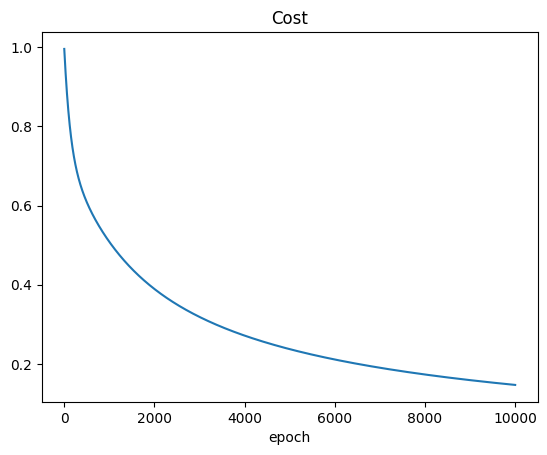

In [11]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [12]:
test1 = sess.run(hypothesis, feed_dict={X:[[0,0]]})

In [13]:
print(test1[0][0])

0.009030439


In [14]:
for i in range(4):
  test1 = sess.run(hypothesis, feed_dict={X:[x_data[i]]})
  print(i, x_data[i], y_data[i], '-----', test1)

0 [0. 0.] [0.] ----- [[0.00903044]]
1 [0. 1.] [0.] ----- [[0.15254274]]
2 [1. 0.] [0.] ----- [[0.15327424]]
3 [1. 1.] [1.] ----- [[0.7814505]]


In [15]:
acc1 = sess.run(accuracy, feed_dict={X: x_data, Y: y_data})

In [16]:
print(acc1)

1.0
